# Plotting and Visualization
## 9.1 A Brief matplotlib API Primer

In [2]:
# 在进行设置时，需要在Jupyter notebook中执行以下语句
#%matplotlib notebook
import matplotlib.pyplot as plt

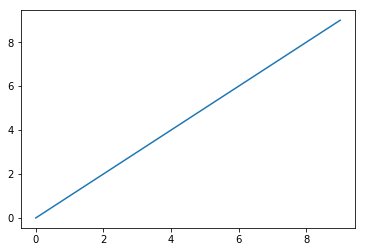

In [3]:
import numpy as np
data = np.arange(10)
data
plt.plot(data)

### 9.1.1 Figures and Subplots
matplotlib所绘制的图位于图片(Figure)对象中

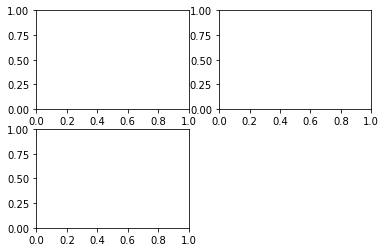

In [4]:
fig = plt.figure() # 生成一个空白页
ax1=fig.add_subplot(2,2,1) # 第一个图
ax2=fig.add_subplot(2,2,2) # 第二个图
ax3=fig.add_subplot(2,2,3) # 第三个图

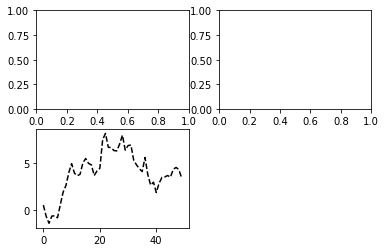

In [26]:
fig = plt.figure() # 生成一个空白页
ax1=fig.add_subplot(2,2,1) # 第一个图
ax2=fig.add_subplot(2,2,2) # 第二个图
ax3=fig.add_subplot(2,2,3) # 第三个图
plt.plot(np.random.randn(50).cumsum(), 'k--') # cumsum()函数表示从0开始元素累积加
# 'k--'是用于绘制黑色分段线的style选项

fig.add_subplot返回的对象是Axes Subplot对象，使用这些对象你可以直接在其他空白页的子图上调用对象的实例方法进行绘图

In [27]:
_ = ax1.hist(np.random.randn(100), bins=20, color='g', alpha=0.3)
# hist 表示绘制直方图
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
# scatter 表示散点图绘制

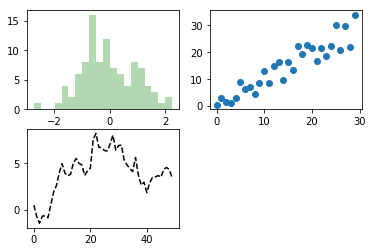

In [28]:
fig

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020558F3D0B8>,
      dtype=object)

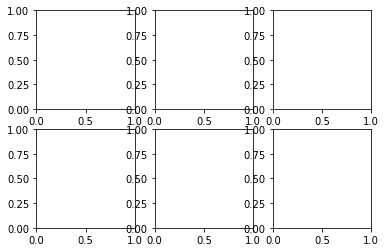

In [31]:
fig, axes = plt.subplots(2, 3) # 定义一个2行3列的图片 即添加图片的数量
axes

#### 9.1.1.1 Adjusting the spacing around subplots

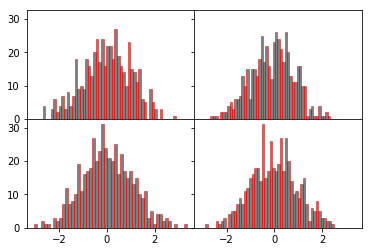

In [34]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True) # 所有子图使用相同的x，y轴刻度
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5,edgecolor='r')
plt.subplots_adjust(wspace=0, hspace=0)

matplotlib并不检查标签是否重复

### 9.1.2 Colors, Markers, and Line Styles

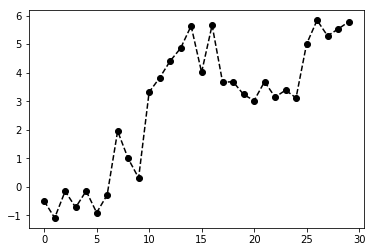

In [40]:
# 折线图还可以有标记用来凸显实际
from numpy.random import randn
plt.plot(randn(30).cumsum(),'ko--')
# 实心圆，从0开始累加
# 等价于 plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

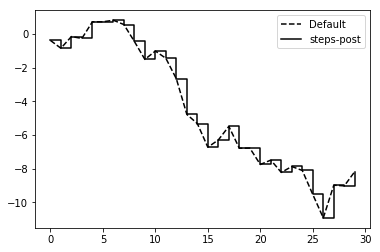

In [44]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default') # 黑色虚线，不要标签
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post') # 黑色直线，阶梯式
plt.legend(loc='best') # 自动选择图题放在图中的位置

无论你在用数据绘图时是否传递了label选项，都必须调用plt.legend

### 9.1.3 Ticks, Labels, and Legends

#### 9.1.3.1 Setting the title, axis labels, ticks, and ticklabels

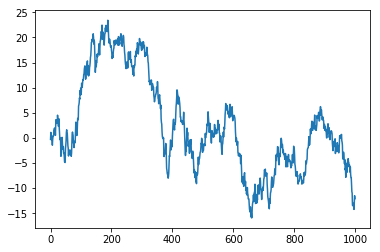

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum()) # 1000个正态分布相加

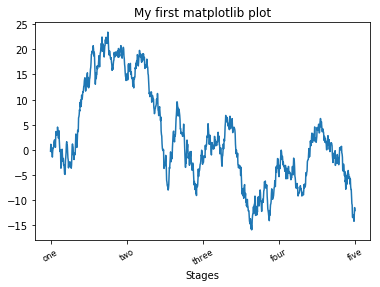

In [56]:
ticks=ax.set_xticks([0,250,500,750,1000])
labels=ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
# rotation选项将x轴刻度标签旋转30度
ax.set_title('My first matplotlib plot') # 给子图一个标题
ax.set_xlabel('Stages') # 给x轴一个名称
fig

#### 9.1.3.2 Adding legends

图例是用来区分绘图元素的另一个重要内容，最简单的方式是在添加每个图表时传递一个label参数

In [57]:
from numpy.random import randn

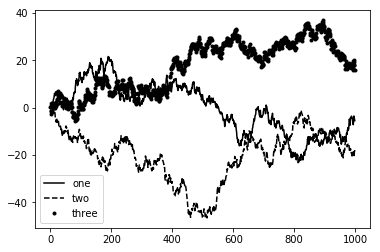

In [62]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three') 
# ax.legend()或plt.legend自动生成图例
ax.legend(loc='best') # 自动选择图题放在图中最合适的位置

如果取消图例中的元素，不要传入label参数或者传入label='_nonlegend_'

### 9.1.4 Annotations and Drawing on a Subplot

可以使用text,arrow和annote方法添加注释文本，箭头以及其他图形

In [64]:
ax.text(x, y, 'Hello world!',family='monospace', fontsize=10)

NameError: name 'x' is not defined

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

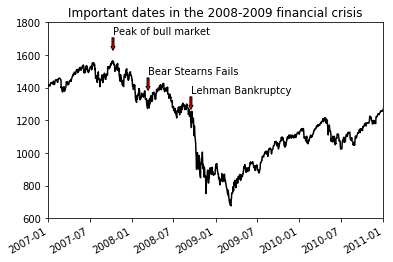

In [67]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='red', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')
# ax.annotate方法可以在指定的x和y坐标上绘制标签
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
# x和y轴的绘图范围，即设置图表边界

ax.set_title('Important dates in the 2008-2009 financial crisis') # 给图表添加主题

在图表中添加图形时，需要生成patch（补丁）对象shp，并调用ax.add_patch(shp)将它加入到子图中去

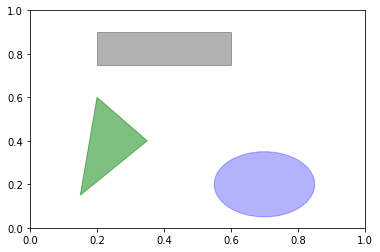

In [68]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3) # (0.7, 0.2)表示圆心
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.5 Saving Plots to File

### 9.1.6 matplotlib Configuration

## 9.2 Plotting with pandas and seaborn
### 9.2.1 Line Plots

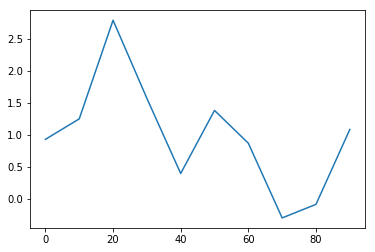

In [82]:
# plot默认绘制折线图
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100,10)) # [0,100)步长为10
s.plot()

DataFrame的plot方法在同一个子图中将每一列绘制为不同的折线

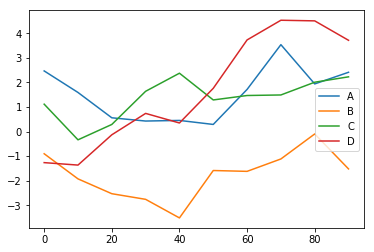

In [76]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot() # 等价于 df.plot.line()

### 9.2.2 Bar Plots

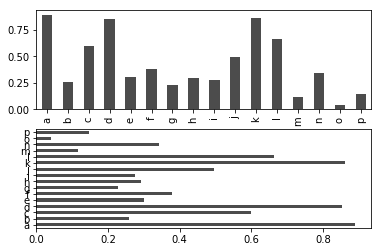

In [85]:
fig, axes = plt.subplots(2, 1) # 2行1列
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

在DataFrame中，柱状图将每一行中的值分组到并排的柱子中的一组

In [86]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.755023,0.028111,0.784566,0.753057
two,0.370453,0.963443,0.038919,0.950161
three,0.835403,0.940931,0.671580,0.578040
four,0.084611,0.778707,0.617235,0.217897
five,0.866860,0.586405,0.931393,0.231602
six,0.928114,0.144752,0.336290,0.439838


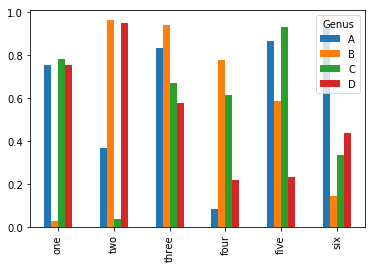

In [87]:
df.plot.bar()

可以传递stacked=True来生成堆积柱状图，会使得每一行的值堆积在一起

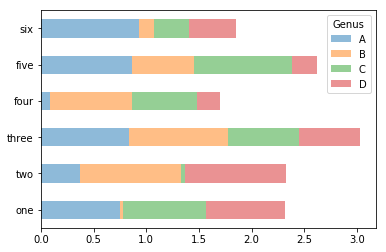

In [88]:
df.plot.barh(stacked=True,alpha=0.5)

使用value_counts:s.value_counts().plot.bar()可以有效地对Series值频率进行可视化

In [90]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [100]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5] # 取每一行以及2到5列
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0) # 进行标准化以确保每一行的值和为1，然后进行绘图
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


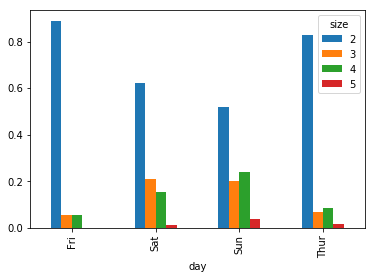

In [99]:
party_pcts.plot.bar()

对于绘图前需要聚合或汇总的数据，使用seaborn会使工作更简单

In [102]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [103]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # 按星期日期计算小费百分比
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


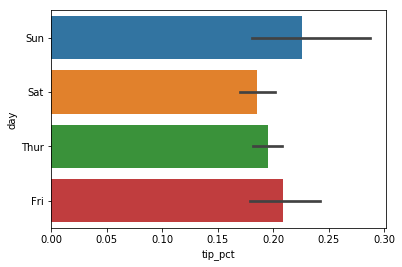

In [104]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
# orient 表示方向 v/h

柱子上画出的黑线代表的是95%的置信区间（置信区间可以通过可选参数进行设置）

置信区间是指由样本统计量所构造的总体参数的估计区间

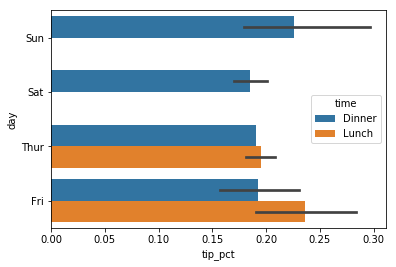

In [105]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
# hue='time' 表示通过一个额外的分类值将数据分离

### 9.2.3 Histograms and Density Plots
直方图是一种条形图，用于给出值频率的离散显示，数据点被分成离散的，均匀间隔的箱，并且绘制每个箱中数据点的数量

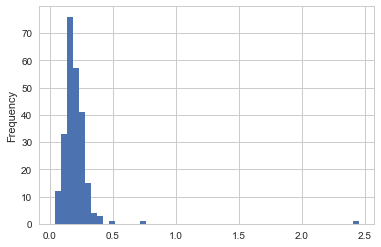

In [108]:
tips['tip_pct'].plot.hist(bins=50)

密度图是一种与直方图相关的图表类型，它通过计算可能产生观测数据的连续概率分布估计而产生的，也被称为内核密度估计图（KDE）

plot.kde使用传统法定混合法估计绘制密度图

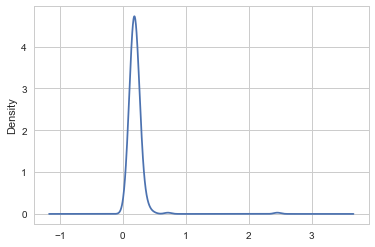

In [111]:
tips['tip_pct'].plot.kde()
# 等价于 tips['tip_pct'].plot.density()

distplot方法可以绘制直方图和连续密度估计

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


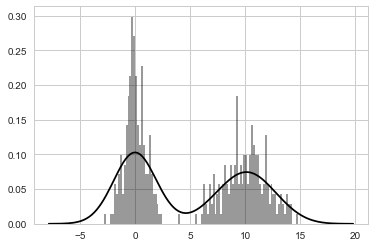

In [112]:
comp1=np.random.normal(0,1,size=200)
comp2=np.random.normal(10,2,size=200)
values=pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values,bins=100,color='k')

### 9.2.4 Scatter or Point Plots

点图或散点图可以用于检验两个一维数据序列之间的关系

In [113]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
# diff  计算第一个算术差值（对事件序列有用）
# dropna   根据每个标签的值是否是缺失数据来筛选轴标签，并根据允许丢失的数据量来确定阈值
trans_data[-5:] # 取最后5个值

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


seaborn的regplot方法，可以绘制散点图，并拟合出一条线性回归线

Text(0.5,1,'Changes in log m1 versus log unemp')

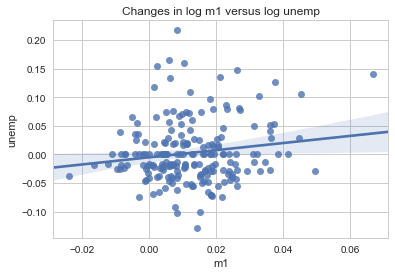

In [114]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

在探索线性数据分析中，能够查看一组变量中的所有散点图是有帮助的，这被称为成对图或散点图矩阵

seaborn中的pairplot函数，它支持在对角线上放置每个变量的直方图或密度估计值

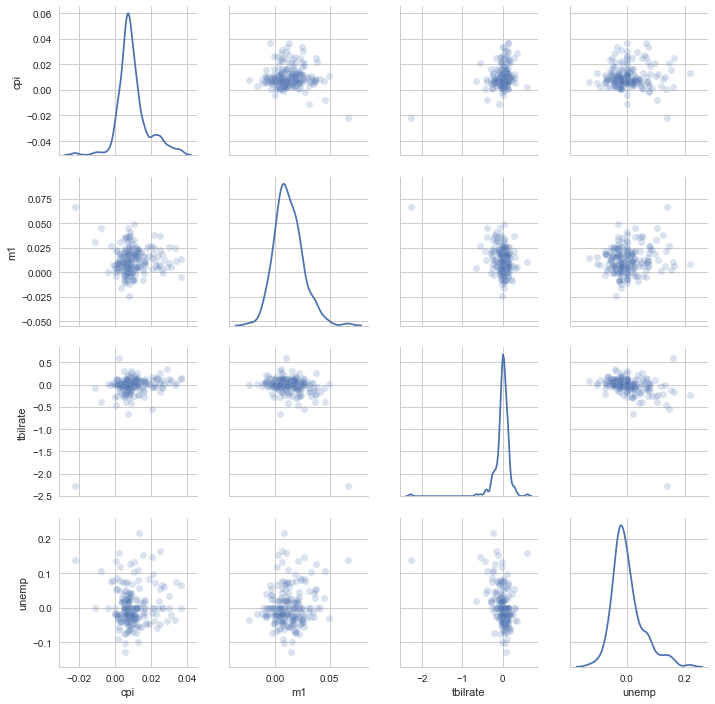

In [115]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

plot_ksw参数，将配置选项传递给非对角元素上的各个绘图调用

### 9.2.5 Facet Grids and Categorical Data

seaborn中内建函数factorplot,可以简化多种分面绘制图

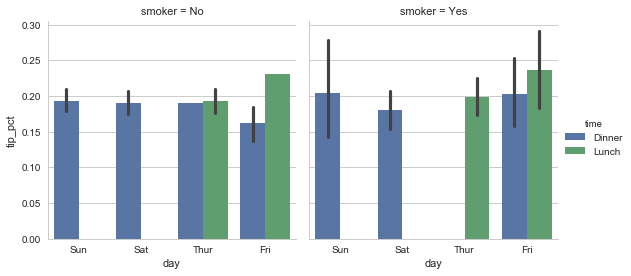

In [116]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])
# hue='time' 额外的分类值将数据分离
# kind='bar'垂直的柱状图

除了根据'time'在一个面内将不同的柱分组为不同的颜色，还可以通过每个时间值添加一行来扩展分面网格

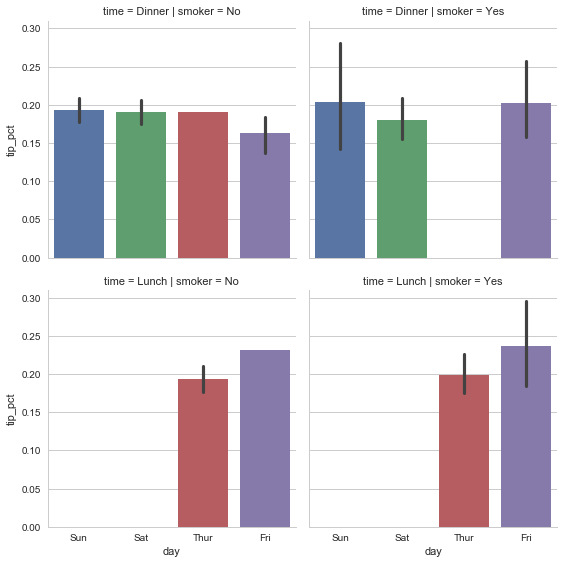

In [117]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

factorplot支持其他可能有用的图类型，具体取决于你要显示的内容，例如，箱型图(显示中位值，四分位数和异常值)可以是有效的可视化类型

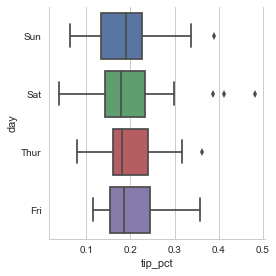

In [118]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

可以使用seaborn.FacetGrid类创建自己的分面网格图